### выполнить предобработку признаков данного датасета как числовых, так и категориальных. Далее выполнить нормировку признаков с помощью библиотеки scikit learn (StandartScalar) и обучить известные Вам модели бинарной классификации (kNN, Bayes, SVM).



In [1]:
import numpy as np
import pandas as pd
from google.colab import files
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from scipy.stats import kurtosis
from scipy.stats import skew
from scipy.stats import shapiro
from scipy.stats import normaltest


## Создал функцию для удобства просмотра

In [2]:
## Просмотр данных
def prosmotr(data):
  pd.set_option('display.max_columns', 100) #Размеры таблицы
  pd.set_option('display.max_rows', 100)
  pd.set_option('precision', 2) #Регулируем количество знаков после запятой:
  print('~~~~Содержание данных~~~~\n', data.head())
  print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
  print('~~~Размеры данных~~~\n', data.shape)
  print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
  print('~~~Названия колонок~~~\n', data.columns)
  print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
  print('~~~Информация о данных~~~\n')
  print(data.info())
  print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
  print('~~~Наличие пропусков в данных~~~\n', data.isna().sum())
  print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
  print('~~~Количество типов в данных~~~')
  print(data.dtypes.value_counts())
  print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
  kateg = list(data.select_dtypes(include=['object']).columns) # Делаем список категориальных данных
  print('~~~Категориальные данные~~~~')
  print(kateg)
  print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
  chislov_float = list(data.select_dtypes(include=['float64'])) #Делаем список числовых данных float
  print('~~~Числове данные float~~~~')
  print(chislov_float)
  print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
  chislov_int = list(data.select_dtypes(include=['int64'])) #Делаем список числовых данных int
  print('~~~Числове данные int~~~~')
  print(chislov_int)
  print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
  print('~~~Основные статистические характеристики данных по каждому числовому признаку (типы int64)~~~\n', data.describe(include=['int64']))
  print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
  print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
  print('~~~Основные статистические характеристики данных по каждому числовому признаку (типы float64)~~~\n', data.describe(include=['float64']))
  print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
  print('~~~Cтатистика по нечисловым признакам object ~~~\n', data.describe(include=['object']))
  print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
  print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
  print('~~~Cтатистика по нечисловым признакам bool ~~~\n', data.describe(include=['bool']))
  print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')

 

In [3]:
## Анализ данных
def analyze(data):
  num = data.columns
  for i in num:
    print(i.title())
    print('~~~~~~~~~~~~~~~~~~~~~~~~~\n')
    print("mean : ", np.mean(data[i]))
    print("var  : ", np.var(data[i]))
    print("skew : ", skew(data[i]))
    print("kurt : ", kurtosis(data[i]))
    print("shapiro : ", shapiro(data[i]))
    print("normaltest : ", normaltest(data[i]))
    print('~~~~~~~~~~~~~~~~~~~~~~~~~')
    print('~~~~~~~~~~~~~~~~~~~~~~~~~\n')


## Функции для работы с данными

In [4]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

# Для кодировки
def cod(data):
  cate=[key for key in dict(data.dtypes) if dict(data.dtypes)[key] in ['bool', 'object']]
  le = preprocessing.LabelEncoder()
  for i in cate:
    le.fit(data[i])
    data[i] = le.transform(data[i])
  return data

In [5]:
# Автоматическая нормировка данных
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
def standart(data):
  features_float = list(data.select_dtypes(include=['float']).columns) #выбираю колонки с float
  train_temp = data[features_float]
  scaler.fit(train_temp)
  train_temp_prep = scaler.transform(train_temp)
  t= pd.DataFrame(train_temp_prep)
  t.columns = features_float
  features_int = list(data.select_dtypes(include=['int']).columns) #выбираю колонки с int
  train_temp_int = data[features_int]
  scaler.fit(train_temp_int)
  train_temp_prep_int = scaler.transform(train_temp_int)
  i_t= pd.DataFrame(train_temp_prep_int)
  i_t.columns = features_int
  preob = pd.concat([t, i_t],axis=1)                           #сшиваю данные
  return preob

## Функции по алгоритмам

In [6]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV


def fit_model(model, X, y, parameters):  
  cross_validation = StratifiedKFold(n_splits=5)

  grid_search = GridSearchCV(model,
                              scoring='accuracy',
                              param_grid=parameters,
                              cv=cross_validation,
                              verbose=1
                            )

  grid_search.fit(X, y)
  parameters=grid_search.best_params_
  print('Best score: {}'.format(grid_search.best_score_))
  print('Best parameters: {}'.format(parameters))

  return grid_search

## KNN

In [7]:
from sklearn.neighbors import KNeighborsClassifier

def KNN(train, targets):
  parameter_grid = {
                 'n_neighbors': [2, 5, 10, 15, 20, 25],
                 'metric': ['chebyshev', 'manhattan', 'euclidean', 'minkowski'],
                 'algorithm': ['ball_tree', 'kd_tree', 'brute']
                 }
  knn = KNeighborsClassifier()
  trained = fit_model(knn, train, targets, parameter_grid)
  return trained

## BAYES

In [8]:
from sklearn.naive_bayes import BernoulliNB, GaussianNB, MultinomialNB, ComplementNB


def Bern(train, targets):
  parameter_grid = {
                 'alpha': [0.001, 0.01, 0.1, 0.2, 0.5, 1.0],
                 'binarize': [0.0, 0.2, 0.5],
                 'fit_prior': ['True', 'False']
                 }
  bernoulli = BernoulliNB()
  trained_bernoulli = fit_model(bernoulli, train, targets, parameter_grid)
  return trained_bernoulli

def Gaus(train, targets):
  gaussian_nb = GaussianNB()
  parameter_grid = {
                 'var_smoothing': [1e-09, 1e-10, 1e-11, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
                 }
  trained_gaussian_nb = fit_model(gaussian_nb, train, targets, parameter_grid)
  return trained_gaussian_nb

def Multi_nb(train, targets):
  multi_nb = MultinomialNB()
  parameter_grid = {
                 'alpha': [0.001, 0.01, 0.1, 0.2, 0.5, 1.0],
                 'fit_prior': ['True', 'False']
                 }
  trained_multi_nb = fit_model(multi_nb, train, targets, parameter_grid)
  return trained_multi_nb

def Complement_nb(train, targets):
  complement_nb = ComplementNB()
  parameter_grid = {
                 'alpha': [0.001, 0.01, 0.1, 0.2, 0.5, 1.0],
                 'fit_prior': ['True', 'False'],
                 'norm': ['True', 'False']
                 }
  trained_complement_nb = fit_model(complement_nb, train, targets, parameter_grid)
  return trained_complement_nb


## SVM

In [9]:
from sklearn import svm

def SVM(train, targets):
    Svm = svm.SVC(kernel='rbf')
    param_grid = {
        'C': [0.001, 0.01, 0.1, 1, 10],
        'gamma' : [0.001, 0.01, 0.1, 1]        
    }
    train_Svm = fit_model(Svm, train, targets,param_grid)
    return train_Svm
  
  


### Чтение из файла и первичный анализ

In [ ]:
#file = files.upload()

Saving telecom_churn.csv to telecom_churn (3).csv


In [ ]:
#df = pd.read_csv('telecom_churn.csv')
df= pd.read_csv('/content/drive/My Drive/ugroz/dat.csv')

In [ ]:
prosmotr(df)

~~~~Содержание данных~~~~
    Unnamed: 0   ProductName EngineVersion       AppVersion  AvSigVersion  \
0           0  win8defender   1.1.15100.1  4.18.1807.18075  1.273.1735.0   
1           1  win8defender   1.1.14600.4     4.13.17134.1    1.263.48.0   
2           2  win8defender   1.1.15100.1  4.18.1807.18075  1.273.1341.0   
3           3  win8defender   1.1.15100.1  4.18.1807.18075  1.273.1527.0   
4           4  win8defender   1.1.15100.1  4.18.1807.18075  1.273.1379.0   

   IsBeta  RtpStateBitfield  IsSxsPassiveMode  AVProductStatesIdentifier  \
0       0               7.0                 0                    53447.0   
1       0               7.0                 0                    53447.0   
2       0               7.0                 0                    53447.0   
3       0               7.0                 0                    53447.0   
4       0               7.0                 0                    53447.0   

   AVProductsInstalled  AVProductsEnabled  HasTpm  CountryI

ValueError: ignored

In [ ]:
df.head(3)

,Unnamed: 0,ProductName,EngineVersion,AppVersion,AvSigVersion,IsBeta,RtpStateBitfield,IsSxsPassiveMode,AVProductStatesIdentifier,AVProductsInstalled,AVProductsEnabled,HasTpm,CountryIdentifier,CityIdentifier,Platform,Processor,OsVer,OsBuild,OsSuite,OsPlatformSubRelease,OsBuildLab,SkuEdition,IsProtected,AutoSampleOptIn,SMode,IeVerIdentifier,SmartScreen,Firewall,UacLuaenable,Census_MDC2FormFactor,Census_DeviceFamily,Census_OEMNameIdentifier,Census_OEMModelIdentifier,Census_ProcessorCoreCount,Census_ProcessorManufacturerIdentifier,Census_ProcessorModelIdentifier,Census_ProcessorClass,Census_PrimaryDiskTotalCapacity,Census_PrimaryDiskTypeName,Census_SystemVolumeTotalCapacity,Census_HasOpticalDiskDrive,Census_TotalPhysicalRAM,Census_ChassisTypeName,Census_InternalPrimaryDiagonalDisplaySizeInInches,Census_InternalPrimaryDisplayResolutionHorizontal,Census_InternalPrimaryDisplayResolutionVertical,Census_PowerPlatformRoleName,Census_InternalBatteryNumberOfCharges,Census_OSVersion,Census_OSArchitecture,Census_OSBranch,Census_OSBuildNumber,Census_OSBuildRevision,Census_OSEdition,Census_OSSkuName,Census_OSInstallTypeName,Census_OSInstallLanguageIdentifier,Census_OSUILocaleIdentifier,Census_OSWUAutoUpdateOptionsName,Census_IsPortableOperatingSystem,Census_GenuineStateName,Census_ActivationChannel,Census_IsFlightsDisabled,Census_FlightRing,Census_ThresholdOptIn,Census_FirmwareManufacturerIdentifier,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsWIMBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections
0,0,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1735.0,0,7.0,0,53447.0,1.0,1.0,1,29,128035.0,windows10,x64,10.0.0.0,17134,256,rs4,17134.1.amd64fre.rs4_release.180410-1804,Pro,1.0,0,0.0,137.0,NaN,1.0,1.0,Desktop,Windows.Desktop,2668.0,9124.0,4.0,5.0,2340.0,NaN,476940.0,HDD,299451.0,0,4096.0,Desktop,18.9,1440.0,900.0,Desktop,4.29e+09,10.0.17134.165,amd64,rs4_release,17134,165,Professional,PROFESSIONAL,UUPUpgrade,26.0,119,UNKNOWN,0,IS_GENUINE,Retail,0.0,Retail,NaN,628.0,36144.0,0,NaN,0.0,0,0,0.0,0.0,10.0,0
1,1,win8defender,1.1.14600.4,4.13.17134.1,1.263.48.0,0,7.0,0,53447.0,1.0,1.0,1,93,1482.0,windows10,x64,10.0.0.0,17134,256,rs4,17134.1.amd64fre.rs4_release.180410-1804,Pro,1.0,0,0.0,137.0,NaN,1.0,1.0,Notebook,Windows.Desktop,2668.0,91656.0,4.0,5.0,2404.0,NaN,476940.0,HDD,102385.0,0,4096.0,Notebook,13.9,1366.0,768.0,Mobile,1.00e+00,10.0.17134.1,amd64,rs4_release,17134,1,Professional,PROFESSIONAL,IBSClean,8.0,31,UNKNOWN,0,OFFLINE,Retail,0.0,NOT_SET,NaN,628.0,57858.0,0,NaN,0.0,0,0,0.0,0.0,8.0,0
2,2,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1341.0,0,7.0,0,53447.0,1.0,1.0,1,86,153579.0,windows10,x64,10.0.0.0,17134,768,rs4,17134.1.amd64fre.rs4_release.180410-1804,Home,1.0,0,0.0,137.0,RequireAdmin,1.0,1.0,Desktop,Windows.Desktop,4908.0,317701.0,4.0,5.0,1972.0,NaN,114473.0,SSD,113907.0,0,4096.0,Desktop,21.5,1920.0,1080.0,Desktop,4.29e+09,10.0.17134.165,amd64,rs4_release,17134,165,Core,CORE,UUPUpgrade,7.0,30,FullAuto,0,IS_GENUINE,OEM:NONSLP,0.0,Retail,NaN,142.0,52682.0,0,NaN,0.0,0,0,0.0,0.0,3.0,0


**Изменить тип колонки** можно с помощью метода `astype`. Применим этот метод к признаку `Churn` и переведём его в `int64`:

In [ ]:
df['Churn'] = df['Churn'].astype('int64')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f83a3667128>,
      dtype=object)

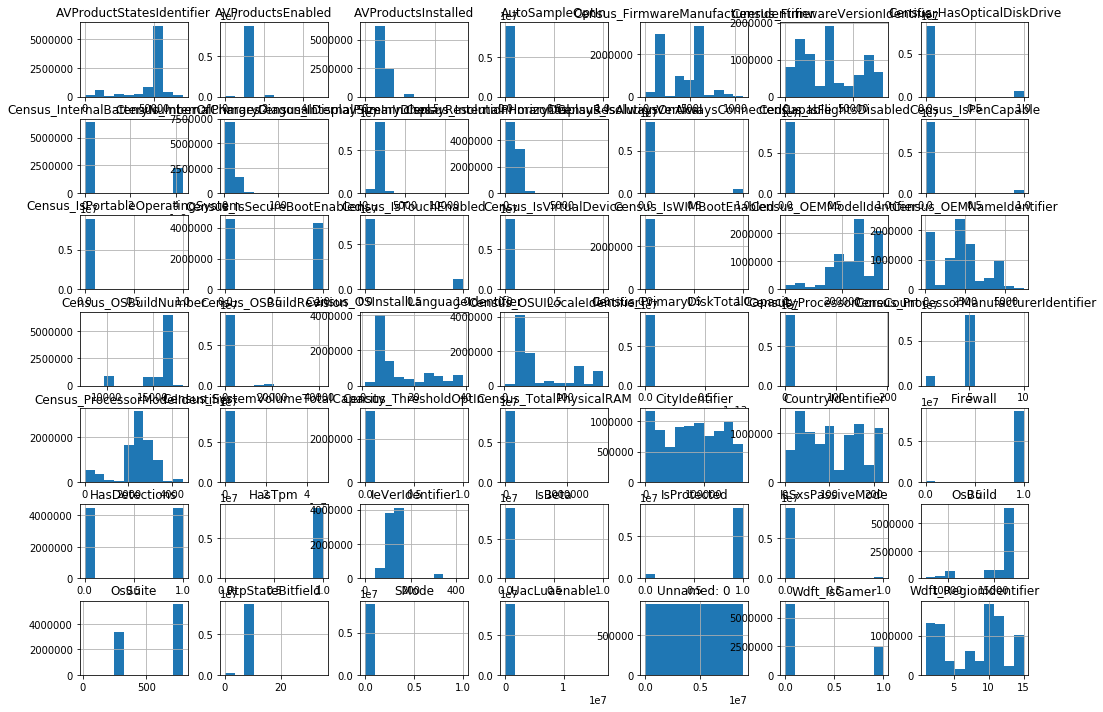

In [ ]:
df.hist(figsize=(17,12))

## Кодируем данные

In [ ]:
codir = cod(df)
codir.head(3)

# Выделим основную цель и уберем из тренировочного набора

In [ ]:
y = df['Churn']
df = df.drop(['Churn'],axis=1)

In [ ]:
y.head(3)

0    0
1    0
2    0
Name: Churn, dtype: int64

## Нормировка данных

In [ ]:
dan = standart(df)
dan.head()

,Total day minutes,Total day charge,Total eve minutes,Total eve charge,Total night minutes,Total night charge,Total intl minutes,Total intl charge,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day calls,Total eve calls,Total night calls,Total intl calls,Customer service calls
0,1.57,1.57,-0.07,-0.07,0.87,0.87,-0.09,-0.09,-0.68,0.68,-0.52,-0.33,1.62,1.23,0.48,-0.06,-0.47,-0.60,-0.43
1,-0.33,-0.33,-0.11,-0.11,1.06,1.06,1.24,1.24,0.60,0.15,-0.52,-0.33,1.62,1.31,1.12,0.14,0.15,-0.60,-0.43
2,1.17,1.17,-1.57,-1.57,-0.76,-0.76,0.70,0.70,0.33,0.90,-0.52,-0.33,-0.62,-0.59,0.68,0.50,0.20,0.21,-1.19
3,2.20,2.20,-2.74,-2.74,-0.08,-0.08,-1.30,-1.31,0.60,-0.43,-0.69,3.05,-0.62,-0.59,-1.47,-0.61,-0.57,1.02,0.33
4,-0.24,-0.24,-1.04,-1.04,-0.28,-0.28,-0.05,-0.05,0.67,-0.65,-0.52,3.05,-0.62,-0.59,0.63,1.10,1.07,-0.60,1.09


# Алгоритмы

In [ ]:
KNN(dan, y)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Best score: 0.8907890789078908
Best parameters: {'algorithm': 'ball_tree', 'metric': 'manhattan', 'n_neighbors': 5}


[Parallel(n_jobs=1)]: Done 360 out of 360 | elapsed:   27.3s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                         'metric': ['chebyshev', 'manhattan', 'euclidean',
                                    'minkowski'],
                         'n_neighbors': [2, 5, 10, 15, 20, 25]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=1)

In [ ]:
Bern(dan, y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best score: 0.8547854785478548
Best parameters: {'alpha': 0.001, 'binarize': 0.0, 'fit_prior': 'True'}


[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:    1.0s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             error_score='raise-deprecating',
             estimator=BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None,
                                   fit_prior=True),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.001, 0.01, 0.1, 0.2, 0.5, 1.0],
                         'binarize': [0.0, 0.2, 0.5],
                         'fit_prior': ['True', 'False']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=1)

In [ ]:
Gaus(dan, y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best score: 0.8658865886588659
Best parameters: {'var_smoothing': 1e-09}


[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:    0.2s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             error_score='raise-deprecating',
             estimator=GaussianNB(priors=None, var_smoothing=1e-09), iid='warn',
             n_jobs=None,
             param_grid={'var_smoothing': [1e-09, 1e-10, 1e-11, 1e-08, 1e-07,
                                           1e-06, 1e-05, 0.0001, 0.001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=1)

In [ ]:
Multi_nb(df, y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best score: 0.6465646564656465
Best parameters: {'alpha': 0.5, 'fit_prior': 'True'}


[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    0.3s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             error_score='raise-deprecating',
             estimator=MultinomialNB(alpha=1.0, class_prior=None,
                                     fit_prior=True),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.001, 0.01, 0.1, 0.2, 0.5, 1.0],
                         'fit_prior': ['True', 'False']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=1)

In [ ]:
Complement_nb(df, y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best score: 0.8583858385838584
Best parameters: {'alpha': 1.0, 'fit_prior': 'True', 'norm': 'True'}


[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:    0.6s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             error_score='raise-deprecating',
             estimator=ComplementNB(alpha=1.0, class_prior=None, fit_prior=True,
                                    norm=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.001, 0.01, 0.1, 0.2, 0.5, 1.0],
                         'fit_prior': ['True', 'False'],
                         'norm': ['True', 'False']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=1)

In [ ]:
SVM(dan, y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   25.7s finished


Best score: 0.9171917191719172
Best parameters: {'C': 10, 'gamma': 0.01}


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10],
                         'gamma': [0.001, 0.01, 0.1, 1]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=1)

# Трансформация признаков, распределение которых далеко от нормального

In [ ]:
from sklearn.preprocessing import PowerTransformer

box_cox_transform = PowerTransformer(method='box-cox', standardize=False) # only works with strictly positive values
yeo_johnson_transform = PowerTransformer(method='yeo-johnson', standardize=False) # works with positive and negative values
box = df
yeo_d = df
log_d = df

In [ ]:
box['Account length'] = box_cox_transform.fit_transform(box['Account length'].values.reshape(box.shape[0],-1))
box['Total night charge'] = box_cox_transform.fit_transform(box['Total night charge'].values.reshape(box.shape[0],-1))

In [ ]:
analyze(box)

State
~~~~~~~~~~~~~~~~~~~~~~~~~

mean :  26.059405940594058
var  :  219.7120424913786
skew :  -0.06458846650810339
kurt :  -1.1812565741755126
shapiro :  (0.9532546997070312, 2.1394326323383863e-31)
normaltest :  NormaltestResult(statistic=2375.499099044319, pvalue=0.0)
~~~~~~~~~~~~~~~~~~~~~~~~~
~~~~~~~~~~~~~~~~~~~~~~~~~

Account Length
~~~~~~~~~~~~~~~~~~~~~~~~~

mean :  66.02554201571856
var  :  572.4264921218672
skew :  -0.050777825533019426
kurt :  -0.07491766102248798
shapiro :  (0.9988387823104858, 0.02132902666926384)
normaltest :  NormaltestResult(statistic=2.1709122069029543, pvalue=0.337747702865478)
~~~~~~~~~~~~~~~~~~~~~~~~~
~~~~~~~~~~~~~~~~~~~~~~~~~

Area Code
~~~~~~~~~~~~~~~~~~~~~~~~~

mean :  437.18241824182417
var  :  1794.7876056732252
skew :  1.1263157243742088
kurt :  -0.7063737258335823
shapiro :  (0.5902662873268127, 0.0)
normaltest :  NormaltestResult(statistic=651.8227674471636, pvalue=2.873984750354634e-142)
~~~~~~~~~~~~~~~~~~~~~~~~~
~~~~~~~~~~~~~~~~~~~~~~~~~

Int

In [ ]:
KNN(box, y)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Best score: 0.8832883288328833
Best parameters: {'algorithm': 'ball_tree', 'metric': 'manhattan', 'n_neighbors': 10}


[Parallel(n_jobs=1)]: Done 360 out of 360 | elapsed:   23.2s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                         'metric': ['chebyshev', 'manhattan', 'euclidean',
                                    'minkowski'],
                         'n_neighbors': [2, 5, 10, 15, 20, 25]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=1)

In [ ]:
Bern(box, y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best score: 0.8475847584758476
Best parameters: {'alpha': 1.0, 'binarize': 0.5, 'fit_prior': 'True'}


[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:    1.0s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             error_score='raise-deprecating',
             estimator=BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None,
                                   fit_prior=True),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.001, 0.01, 0.1, 0.2, 0.5, 1.0],
                         'binarize': [0.0, 0.2, 0.5],
                         'fit_prior': ['True', 'False']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=1)

In [ ]:
Gaus(box, y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best score: 0.8868886888688869
Best parameters: {'var_smoothing': 0.001}


[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:    0.3s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             error_score='raise-deprecating',
             estimator=GaussianNB(priors=None, var_smoothing=1e-09), iid='warn',
             n_jobs=None,
             param_grid={'var_smoothing': [1e-09, 1e-10, 1e-11, 1e-08, 1e-07,
                                           1e-06, 1e-05, 0.0001, 0.001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=1)

In [ ]:
SVM(box, y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   43.4s finished


Best score: 0.861986198619862
Best parameters: {'C': 1, 'gamma': 0.001}


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10],
                         'gamma': [0.001, 0.01, 0.1, 1]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=1)

In [ ]:
yeo_d['Account length'] = yeo_johnson_transform.fit_transform(yeo_d['Account length'].values.reshape(yeo_d.shape[0],-1))
yeo_d['Customer service calls'] = yeo_johnson_transform.fit_transform(yeo_d['Customer service calls'].values.reshape(yeo_d.shape[0],-1))

In [ ]:
analyze(yeo_d)

State
~~~~~~~~~~~~~~~~~~~~~~~~~

mean :  26.059405940594058
var  :  219.7120424913786
skew :  -0.06458846650810339
kurt :  -1.1812565741755126
shapiro :  (0.9532546997070312, 2.1394326323383863e-31)
normaltest :  NormaltestResult(statistic=2375.499099044319, pvalue=0.0)
~~~~~~~~~~~~~~~~~~~~~~~~~
~~~~~~~~~~~~~~~~~~~~~~~~~

Account Length
~~~~~~~~~~~~~~~~~~~~~~~~~

mean :  65.80124182131176
var  :  567.6460816991549
skew :  -0.05201390646577951
kurt :  -0.07430697575518108
shapiro :  (0.9988348484039307, 0.020883964374661446)
normaltest :  NormaltestResult(statistic=2.228335571403, pvalue=0.32818828826877894)
~~~~~~~~~~~~~~~~~~~~~~~~~
~~~~~~~~~~~~~~~~~~~~~~~~~

Area Code
~~~~~~~~~~~~~~~~~~~~~~~~~

mean :  437.18241824182417
var  :  1794.7876056732252
skew :  1.1263157243742088
kurt :  -0.7063737258335823
shapiro :  (0.5902662873268127, 0.0)
normaltest :  NormaltestResult(statistic=651.8227674471636, pvalue=2.873984750354634e-142)
~~~~~~~~~~~~~~~~~~~~~~~~~
~~~~~~~~~~~~~~~~~~~~~~~~~

Inter

In [ ]:
KNN(yeo_d, y)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Best score: 0.8841884188418841
Best parameters: {'algorithm': 'ball_tree', 'metric': 'manhattan', 'n_neighbors': 10}


[Parallel(n_jobs=1)]: Done 360 out of 360 | elapsed:   23.4s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                         'metric': ['chebyshev', 'manhattan', 'euclidean',
                                    'minkowski'],
                         'n_neighbors': [2, 5, 10, 15, 20, 25]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=1)

In [ ]:
Bern(yeo_d, y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best score: 0.8475847584758476
Best parameters: {'alpha': 1.0, 'binarize': 0.5, 'fit_prior': 'True'}


[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:    1.1s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             error_score='raise-deprecating',
             estimator=BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None,
                                   fit_prior=True),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.001, 0.01, 0.1, 0.2, 0.5, 1.0],
                         'binarize': [0.0, 0.2, 0.5],
                         'fit_prior': ['True', 'False']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=1)

In [ ]:
Gaus(yeo_d, y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best score: 0.8895889588958896
Best parameters: {'var_smoothing': 0.0001}


[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:    0.3s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             error_score='raise-deprecating',
             estimator=GaussianNB(priors=None, var_smoothing=1e-09), iid='warn',
             n_jobs=None,
             param_grid={'var_smoothing': [1e-09, 1e-10, 1e-11, 1e-08, 1e-07,
                                           1e-06, 1e-05, 0.0001, 0.001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=1)

In [ ]:
SVM(yeo_d, y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   43.1s finished


Best score: 0.861986198619862
Best parameters: {'C': 1, 'gamma': 0.001}


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10],
                         'gamma': [0.001, 0.01, 0.1, 1]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=1)

In [ ]:
log_d['Total night charge'] = np.log(log_d['Total night charge'].values.reshape(log_d.shape[0],-1))
log_d['Total night calls'] = np.log(log_d['Total night calls'].values.reshape(log_d.shape[0],-1))

In [ ]:
analyze(log_d)

State
~~~~~~~~~~~~~~~~~~~~~~~~~

mean :  26.059405940594058
var  :  219.7120424913786
skew :  -0.06458846650810339
kurt :  -1.1812565741755126
shapiro :  (0.9532546997070312, 2.1394326323383863e-31)
normaltest :  NormaltestResult(statistic=2375.499099044319, pvalue=0.0)
~~~~~~~~~~~~~~~~~~~~~~~~~
~~~~~~~~~~~~~~~~~~~~~~~~~

Account Length
~~~~~~~~~~~~~~~~~~~~~~~~~

mean :  65.80124182131176
var  :  567.6460816991549
skew :  -0.05201390646577951
kurt :  -0.07430697575518108
shapiro :  (0.9988348484039307, 0.020883964374661446)
normaltest :  NormaltestResult(statistic=2.228335571403, pvalue=0.32818828826877894)
~~~~~~~~~~~~~~~~~~~~~~~~~
~~~~~~~~~~~~~~~~~~~~~~~~~

Area Code
~~~~~~~~~~~~~~~~~~~~~~~~~

mean :  437.18241824182417
var  :  1794.7876056732252
skew :  1.1263157243742088
kurt :  -0.7063737258335823
shapiro :  (0.5902662873268127, 0.0)
normaltest :  NormaltestResult(statistic=651.8227674471636, pvalue=2.873984750354634e-142)
~~~~~~~~~~~~~~~~~~~~~~~~~
~~~~~~~~~~~~~~~~~~~~~~~~~

Inter

In [ ]:
KNN(log_d, y)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Best score: 0.8844884488448845
Best parameters: {'algorithm': 'ball_tree', 'metric': 'manhattan', 'n_neighbors': 15}


[Parallel(n_jobs=1)]: Done 360 out of 360 | elapsed:   22.8s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                         'metric': ['chebyshev', 'manhattan', 'euclidean',
                                    'minkowski'],
                         'n_neighbors': [2, 5, 10, 15, 20, 25]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=1)

In [ ]:
Bern(log_d, y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best score: 0.8475847584758476
Best parameters: {'alpha': 1.0, 'binarize': 0.5, 'fit_prior': 'True'}


[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:    1.0s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             error_score='raise-deprecating',
             estimator=BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None,
                                   fit_prior=True),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.001, 0.01, 0.1, 0.2, 0.5, 1.0],
                         'binarize': [0.0, 0.2, 0.5],
                         'fit_prior': ['True', 'False']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=1)

In [ ]:
Gaus(log_d, y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best score: 0.8901890189018902
Best parameters: {'var_smoothing': 0.0001}


[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:    0.3s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             error_score='raise-deprecating',
             estimator=GaussianNB(priors=None, var_smoothing=1e-09), iid='warn',
             n_jobs=None,
             param_grid={'var_smoothing': [1e-09, 1e-10, 1e-11, 1e-08, 1e-07,
                                           1e-06, 1e-05, 0.0001, 0.001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=1)

In [ ]:
SVM(log_d, y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   43.1s finished


Best score: 0.8661866186618662
Best parameters: {'C': 1, 'gamma': 0.001}


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10],
                         'gamma': [0.001, 0.01, 0.1, 1]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=1)